<br>Bug：
<br>取r0,v0=[1,0],[0,0]，若离散化随便取很有可能会出现负的r
<br>Debug:
<br>norm=np.linalg.norm(r[i,:])错写为norm=np.linalg.norm(r[j,:])
<br>Nt设置地太小
<br>PRO:
<br>动图的实现
<br>说明：每行数据代表一个特定时间的量,数据的列代表维度
<br>Qus：
<br>markdown如何提行,如何写得漂亮
<br>参数设置：
<br>注意M要远大于m
<br>注意Nt要设置地较大,若太小的话得到的结果会出现错误
<br>在G,M,m=1,1,0.01;r0=[1,0,0]时,以下情况成立
<br>v0=[0,1,0]:圆周轨道(可以通过半长轴与半段轴来验证)
<br>v0=[0.5,0.7,0.5]/[0,0.7,0.5]:椭圆轨道($v < \sqrt2$)
<br>v0=[0,np.sqrt(2),0]:抛物线轨道($v = \sqrt2$)
<br>v0=[0,1.42,0]/[0.1,1.4,0.2]:双曲线轨道,vy在1.4左右效果较好($v > \sqrt2$)

能量为-0.00505,角动量为0.8602325267042626
轨迹为椭圆
半长轴=1.507093286171727,半短轴=0.49309440202475424


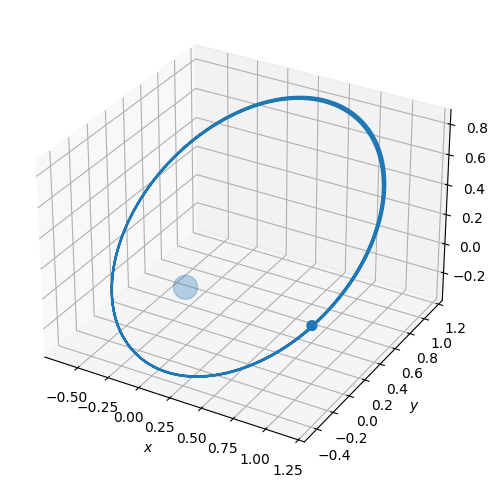

In [11]:
%reset -f
#相当于MATLAB中的clear,用于清空变量区
import numpy as np
#TODO 初始化
G,M,m=1,1,0.01
k=G*M*m
Nt,tN=100000,25
r0,v0=[1,0,0],[0.5,0.7,0.5]#要和维数(dim/dimention)保持一致
tlist=np.linspace(0,tN,Nt)
deltat=tlist[1]-tlist[0]
r=np.zeros((Nt,3))
v=np.zeros((Nt,3))
r[0,:]=r0
v[0,:],v[1,:]=v0,v0
#TODO 计算数据
for i in range(Nt-1):
    norm=np.linalg.norm(r[i,:])
    for j in range(3):
        q=r[i,j]
        v[i+1,j]=-k*q*deltat/norm**3/m+v[i,j]#下一时刻的速度分量,注意负号表示吸引力
        deltaq=(v[i+1,j]+v[i,j])/2*deltat
        r[i+1,j]=q+deltaq#下一时刻的坐标分量
#结果分析
norm=np.sqrt(r**2@np.ones(3))
a,b=np.max(norm),np.min(norm)
v0norm,r0norm=np.linalg.norm(v0),np.linalg.norm(r0)
L=np.linalg.norm(np.cross(r0,v0))
E=0.5*m*v0norm**2-k/r0norm
print(f'能量为{E},角动量为{L}')
if E<0:
    print('轨迹为椭圆')
    print(f'半长轴={a},半短轴={b}')
elif E==0:
    print('轨迹为抛物线')
else:
    print('轨迹为双曲线')
#TODO 作图
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6))#设置大小
ax=fig.add_subplot(projection="3d")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.plot(r[:,0],r[:,1],r[:,2])
ax.scatter([0,1],[0,0],[0,0],s=[300,50])#中心天体
plt.show()